In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
AllChem.SetPreferCoordGen(True)

In [2]:
def heteroAtomMolFrag(smile, radius):
    mol=Chem.MolFromSmiles(smile)
    hetero_list=[7, 8, 15, 16]
    atoms=mol.GetAtoms()
    submols=[]
    for i in hetero_list:
        for atom in atoms:
            if atom.GetAtomicNum()==i:
                env=Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom.GetIdx())
                amap={}
                submol=Chem.PathToSubmol(mol, env, atomMap=amap)
                subsmi=Chem.MolToSmiles(submol, rootedAtAtom=amap[atom.GetIdx()], canonical=False)
                submols.append(Chem.MolFromSmiles(subsmi, sanitize=False))
    return submols

In [3]:
smile='CC(CNC)P(C)C'
submols1=heteroAtomMolFrag(smile, 2)
submols2=heteroAtomMolFrag(smile, 3)

In [8]:
import numpy as np
np.array(submols1)

array([<rdkit.Chem.rdchem.Mol object at 0x00000286D30105D0>,
       <rdkit.Chem.rdchem.Mol object at 0x00000286D3010580>], dtype=object)

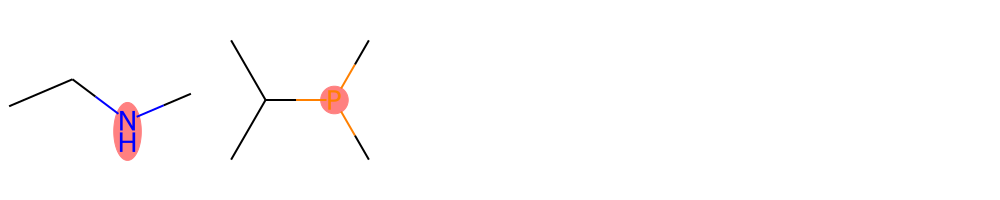

In [4]:
Draw.MolsToGridImage(submols1, highlightAtomLists=[[0] for _ in range(len(submols1))], molsPerRow=5)

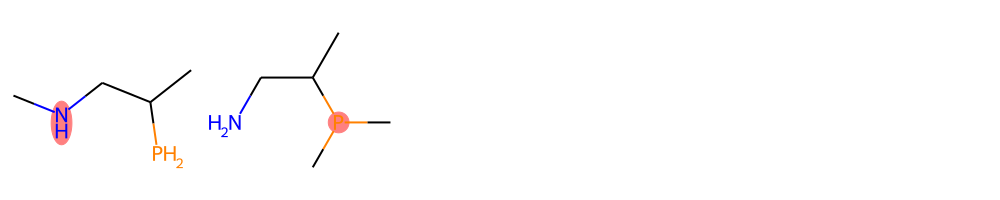

In [5]:
Draw.MolsToGridImage(submols2, highlightAtomLists=[[0] for _ in range(len(submols2))], molsPerRow=5)
